In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [ ]:
data

In [2]:
import glob
data = pd.concat([pd.read_csv(f) for f in glob.glob('se*.csv')])
print(data.columns)
data.dropna(inplace=True)
target = data.pop('flowrate')
m = np.median(target)
v = np.var(target)**(.5)
#target = target-np.min(target)
#target = (target/v)
#target = target*(100/np.max(target))
print(data)
data.pop('Unnamed: 0')
batch_size = 256
training_set_size = int(.2*len(data))
dataset = tf.data.Dataset.from_tensor_slices((data.values, target.values)).shuffle(len(data)).batch(batch_size, drop_remainder=True)
testset = dataset.take(training_set_size//batch_size)
trainset = dataset.skip(training_set_size//batch_size).repeat(10)
np.any(np.isnan(target))
len(data)


Index(['Unnamed: 0', 'Vx1', 'Vy1', 'Vz1', 'P1', 'P2', 'P3', 'P4', 'flowrate'], dtype='object')
      Unnamed: 0       Vx1       Vy1           Vz1         P1         P2  \
0              0  3.876814  1.916041  1.006332e+00   6.136800  10.334200   
1              1  3.102293  2.363314  3.961407e-01   7.893600   9.844900   
2              2  3.041615  1.842067  4.934259e-01   8.116300   9.649200   
3              3  5.166797  1.942071 -6.679608e-01   7.852400   8.572700   
4              4  5.578229  2.074525 -6.780873e-01   6.796600   6.468700   
5              5  6.344273  2.877890 -5.727502e-01   5.740800   5.049700   
6              6  5.967801  2.607268 -7.880977e-01   4.775800   4.853900   
7              7  5.738748  2.700450 -7.787451e-01   4.330400   3.777500   
8              8  7.012391  1.337685 -1.374724e+00   4.487133   3.679600   
9              9  5.478196  2.416172  1.777008e-01   4.643867   3.532800   
10            10  5.259750  3.160377  6.449406e-01   4.800600   3.679

35368

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import time


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Use of this metric is not recommended; for illustration only. 
    See other regression metrics on sklearn docs:
      http://scikit-learn.org/stable/modules/classes.html#regression-metrics
    Use like any other metric
    >>> y_true = [3, -0.5, 2, 7]; y_pred = [2.5, -0.3, 2, 8]
    >>> mean_absolute_percentage_error(y_true, y_pred)
    Out[]: 24.791666666666668
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
start_time = time.time()
svm_clf = Pipeline([
    ("scaler", StandardScaler()), 
    ("linear_svc", SVR(kernel='rbf', gamma='scale', coef0=.01, C=200))
])
a_train, a_test, b_train, b_test = train_test_split(data, target, test_size=0.2)
svm_clf.fit(a_train, b_train)
print(time.time()-start_time)
from sklearn.metrics import mean_absolute_error
print(mean_absolute_percentage_error(b_test, svm_clf.predict(a_test)))

In [4]:
import keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.python.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, PReLU

Using TensorFlow backend.


In [23]:
def train_model(middle_layer_size):
    model = Sequential([
    Dense(middle_layer_size, input_shape=(7,)),
    PReLU(),
    Dense(middle_layer_size),
    PReLU(),
    Dense(middle_layer_size),
    PReLU(),
    Dense(middle_layer_size),
    PReLU(),
    Dense(middle_layer_size),
    Dense(1)])

    model.compile(optimizer=tf.optimizers.Adam(.01),
                loss='mse',
                metrics=['mape'])
    history = model.fit(trainset, validation_data=testset,epochs=50)
    return history

In [24]:
d = {}
for i in [7, 200, 1000]:
    d[i] = train_model(i)

Train for 1110 steps, validate for 27 steps
Epoch 1/50
1110/1110 [==============================] - 3s 3ms/step - loss: 171775.5506 - mape: 21.2557 - val_loss: 96964.6421 - val_mape: 18.4236
Epoch 2/50
1110/1110 [==============================] - 4s 3ms/step - loss: 98502.2437 - mape: 18.3366 - val_loss: 95131.8154 - val_mape: 17.8123
Epoch 3/50
1110/1110 [==============================] - 3s 3ms/step - loss: 96347.7038 - mape: 18.0921 - val_loss: 94952.1623 - val_mape: 17.4536
Epoch 4/50
1110/1110 [==============================] - 3s 3ms/step - loss: 95411.7625 - mape: 17.9310 - val_loss: 97260.2694 - val_mape: 18.3989
Epoch 5/50
1110/1110 [==============================] - 3s 3ms/step - loss: 94689.0126 - mape: 17.8154 - val_loss: 93752.9664 - val_mape: 17.0552
Epoch 6/50
1110/1110 [==============================] - 3s 3ms/step - loss: 94413.3957 - mape: 17.7826 - val_loss: 96457.1372 - val_mape: 17.9192
Epoch 7/50
1110/1110 [==============================] - 3s 3ms/step - loss: 942

1110/1110 [==============================] - 7s 7ms/step - loss: 81484.0683 - mape: 15.8782 - val_loss: 76950.2245 - val_mape: 15.4738
Epoch 7/50
1110/1110 [==============================] - 7s 7ms/step - loss: 79110.5123 - mape: 15.5903 - val_loss: 71633.0775 - val_mape: 15.6445
Epoch 8/50
1110/1110 [==============================] - 8s 7ms/step - loss: 77611.6342 - mape: 15.4349 - val_loss: 78345.5885 - val_mape: 17.2755
Epoch 9/50
1110/1110 [==============================] - 7s 7ms/step - loss: 75721.4172 - mape: 15.1959 - val_loss: 74896.5788 - val_mape: 15.7155
Epoch 10/50
1110/1110 [==============================] - 8s 7ms/step - loss: 73936.4526 - mape: 15.0216 - val_loss: 68406.2023 - val_mape: 14.2335
Epoch 11/50
1110/1110 [==============================] - 7s 6ms/step - loss: 72802.0963 - mape: 14.8661 - val_loss: 68229.3655 - val_mape: 14.7684
Epoch 12/50
1110/1110 [==============================] - 7s 7ms/step - loss: 70633.4470 - mape: 14.6041 - val_loss: 67252.0030 - val_

KeyboardInterrupt: 

Train for 1110 steps, validate for 27 steps
Epoch 1/50
1110/1110 [==============================] - 3s 3ms/step - loss: 175375.3746 - mape: 21.3969 - val_loss: 99875.9572 - val_mape: 18.0274
Epoch 2/50
1110/1110 [==============================] - 3s 3ms/step - loss: 99442.0848 - mape: 18.5171 - val_loss: 106956.6557 - val_mape: 17.7591
Epoch 3/50
1110/1110 [==============================] - 3s 3ms/step - loss: 97687.5596 - mape: 18.3049 - val_loss: 93688.3307 - val_mape: 18.0985
Epoch 4/50
1110/1110 [==============================] - 4s 3ms/step - loss: 95920.8673 - mape: 18.0979 - val_loss: 97542.5159 - val_mape: 18.4528
Epoch 5/50
1110/1110 [==============================] - 5s 5ms/step - loss: 94550.9586 - mape: 17.9024 - val_loss: 96633.1317 - val_mape: 18.7699
Epoch 6/50
1110/1110 [==============================] - 3s 3ms/step - loss: 94071.8589 - mape: 17.7311 - val_loss: 92198.9916 - val_mape: 17.9252
Epoch 7/50
1110/1110 [==============================] - 3s 2ms/step - loss: 93

<IPython.core.display.Javascript object>


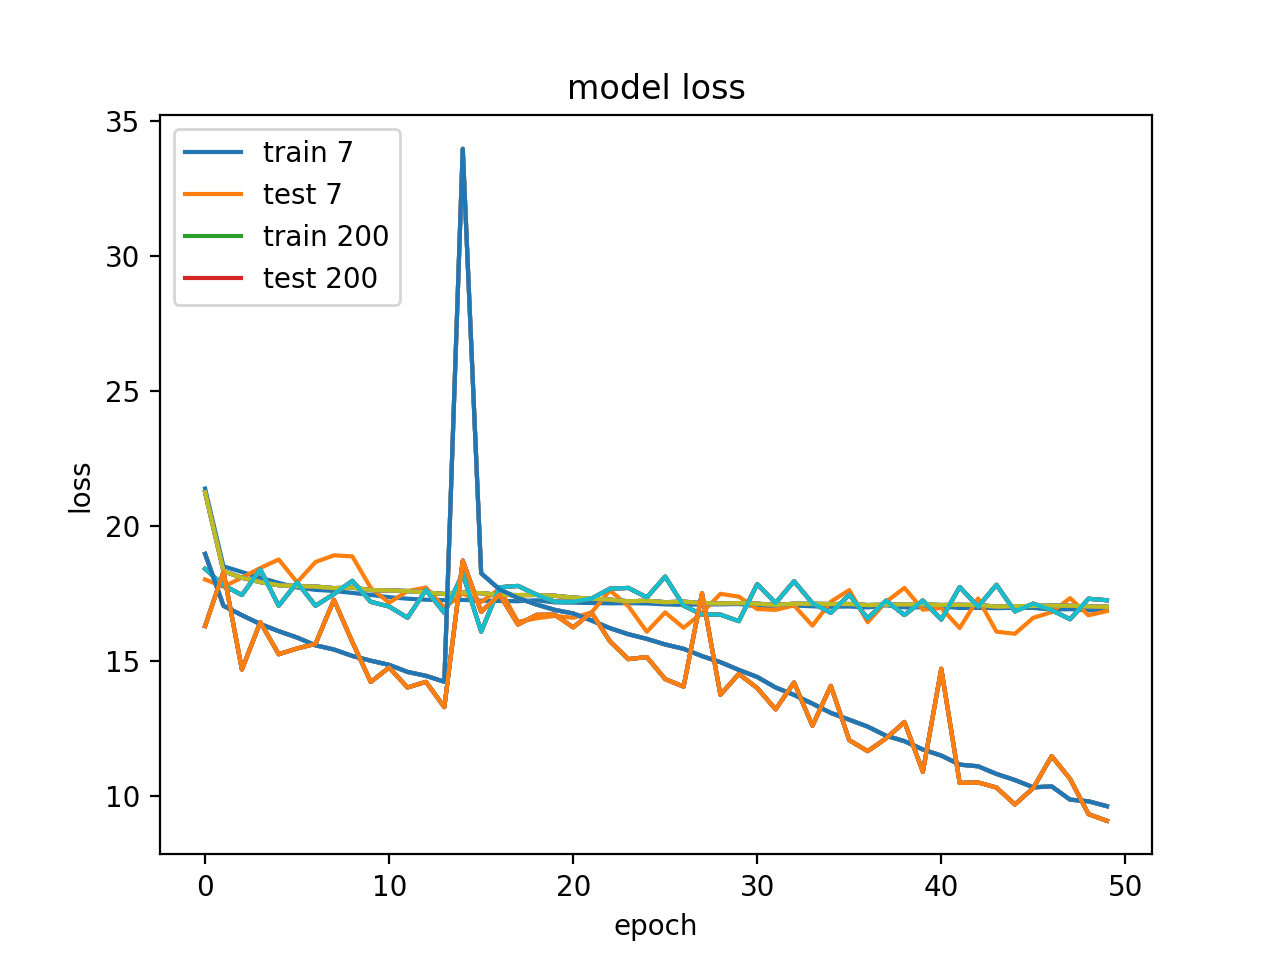

In [20]:


# Visualize training history
import matplotlib.pyplot as plt
import numpy
%matplotlib notebook
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
for k in d.keys():
    history = d[k]
    plt.plot(history.history['mape'])
    plt.plot(history.history['val_mape'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
plt.legend(['train 7', 'test 7', 'train 200', 'test 200'], loc='upper left')
plt.show()
plt.savefig("comparison.jpg")

for pred, true in zip(model.predict(data), target):
    print(pred[0]-true)

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
import glob
for f in [f for f in glob.glob('*.csv')]:
    print(f)
    data = pd.read_csv(f)
    data.dropna(inplace=True)
    data.pop('Unnamed: 0')
    target = data.pop('flowrate')
    batch_size = 128
    dataset = tf.data.Dataset.from_tensor_slices((data.values, target.values)).shuffle(len(data)).batch(batch_size, drop_remainder=True)
    model.evaluate(dataset)

In [ ]:
model.summary()

[array([[-1.161792  ,  3.4787352 , -1.4216564 ,  2.5999212 , -0.53189474,
         1.5737854 , -1.9998062 ],
       [ 2.656084  ,  0.16508475, -3.9520686 , -4.070426  ,  0.7198864 ,
        -0.22927517, -1.7810048 ],
       [ 0.11518338,  1.2610917 , -0.26619083,  0.07421421,  0.9868205 ,
         2.4993012 , -0.9832117 ],
       [-0.9622694 , -0.27786762, -1.4959486 ,  0.2938428 ,  0.29648963,
        -0.036095  ,  0.84631014],
       [ 1.524718  , -0.11246715,  0.92270416,  0.27911687,  0.02690563,
         0.7306694 ,  0.3798534 ],
       [-0.3014447 , -0.00464762,  0.34428582, -0.29339814,  1.1640503 ,
         1.0080729 ,  1.4963783 ],
       [ 0.26929855, -0.606293  , -0.13883458,  0.14533554,  0.28129077,
         0.08474938,  0.18446453]], dtype=float32), array([  9.188386 , -19.52755  ,  -2.5670924, -11.109314 , -15.125773 ,
         8.320526 ,   7.6782546], dtype=float32)]


IndexError: list index out of range

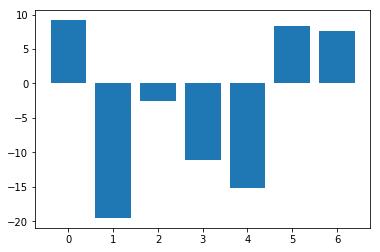

In [18]:
import matplotlib.pyplot as plt
for layer in model.layers:
    w = layer.get_weights()
    plt.bar(range(len(w[1])), w[1])
    plt.savefig("hist2.jpg")
    print(w)